In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (284807, 31)


In [3]:
# Check and scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [4]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled dataset shape:", pd.Series(y_resampled).value_counts())

Resampled dataset shape: Class
0    284315
1    284315
Name: count, dtype: int64


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

In [7]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



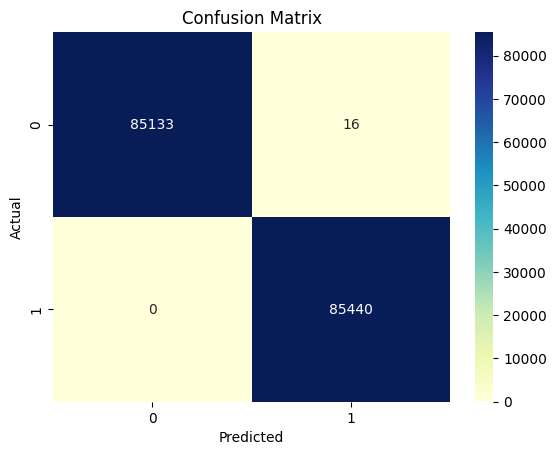

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# --------- Simplified Detection: Random Sample ---------
print("\n--- Credit Card Fraud Detection ---")
print("Displaying prediction for a random transaction from test set:")

random_index = np.random.randint(0, len(X_test))
sample = X_test.iloc[random_index]
actual_label = y_test.iloc[random_index]
prediction = model.predict([sample])[0]

print("\nTransaction Features:")
print(sample)

print(f"\nActual Label      : {'Fraudulent' if actual_label == 1 else 'Genuine'}")
print(f"Predicted Label   : {'Fraudulent' if prediction == 1 else 'Genuine'}")



--- Credit Card Fraud Detection ---
Displaying prediction for a random transaction from test set:

Transaction Features:
Time     -1.324267
V1        0.977433
V2       -0.427256
V3        1.908747
V4        1.755487
V5       -1.372944
V6        0.729958
V7       -1.028629
V8        0.399627
V9        1.306480
V10      -0.257297
V11       0.555063
V12       1.973039
V13       0.494297
V14      -1.036972
V15      -2.400123
V16      -0.418694
V17       0.093509
V18       0.113072
V19       0.373703
V20      -0.054004
V21       0.023702
V22       0.515712
V23      -0.118721
V24       0.601239
V25       0.516707
V26      -0.260420
V27       0.105379
V28       0.037385
Amount   -0.201742
Name: 21905, dtype: float64

Actual Label      : Genuine
Predicted Label   : Genuine


c:\Users\Jayaseelan.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
import numpy as np

# --------- Prediction Section (User-defined minimal input) ---------
print("\n--- Credit Card Fraud Detection ---")
print("Enter only key transaction details to predict (others will be auto-filled)")

try:
    time = float(input("Time (scaled): "))
    amount = float(input("Amount (scaled): "))
    
    v1 = float(input("V1: "))
    v2 = float(input("V2: "))
    v3 = float(input("V3: "))

    # Fill V4 to V28 with 0s
    remaining_v = [0.0] * 25
    
    # Combine all inputs
    transaction = np.array([[time, v1, v2, v3] + remaining_v + [amount]])
    
    prediction = model.predict(transaction)

    print("\nPrediction Result:", "🔴 Fraudulent Transaction" if prediction[0] == 1 else "🟢 Genuine Transaction")

except Exception as e:
    print("Invalid input. Error:", e)




--- Credit Card Fraud Detection ---
Enter only key transaction details to predict (others will be auto-filled)

Prediction Result: 🟢 Genuine Transaction


c:\Users\Jayaseelan.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
